In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
data = pd.read_csv("C:\ML Projects\ML datasets\Bostonhousing.csv")  # Replace with your actual path
data.head()


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\shaun\AppData\Local\Temp\ipykernel_16172\3993018522.py:1: SyntaxWarning: invalid escape sequence '\M'
  data = pd.read_csv("C:\ML Projects\ML datasets\Bostonhousing.csv")  # Replace with your actual path


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Check available column names (to confirm)
print(data.columns)  # Output should show lowercase 'rm' and 'medv'

# Extract features (X) and target (y) with correct column names
X = data[['rm']]  # Use lowercase 'rm'
y = data['medv']   # Use lowercase 'medv'

# Verify
print(X.head())  # Should show the 'rm' column
print(y.head())  # Should show the 'medv' column

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
      rm
0  6.575
1  6.421
2  7.185
3  6.998
4  7.147
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64


In [5]:
#polynomial feature transformation

poly = PolynomialFeatures(degree=2)  # Try degree=3 later
X_poly = poly.fit_transform(X)


In [6]:
#training

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [7]:
#Training polynomial Regression model

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.5176878620868068


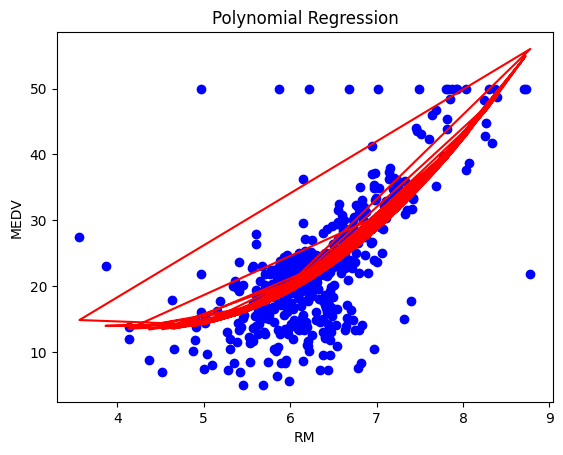

In [9]:
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(poly.fit_transform(X)), color='red')
plt.title("Polynomial Regression")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()


In [10]:
import joblib
joblib.dump(model, "polynomial_model.pkl")


['polynomial_model.pkl']